In [1]:
%load_ext autoreload
%autoreload 2

In [36]:
import argparse
from PIL import Image
from dcp import *
import matplotlib.pyplot as plt


In [3]:
im = Image.open("./data/a.png")
im = np.asarray(im, dtype=np.float64)/255

In [4]:
dc = get_dark_channel(im, patch_size=(15,15))
A = get_atmos_light(im, dc, top_ratio=1e-3)
tilde_t = get_tilde_t(im, A)
L = get_laplace_matting_matrix(im, win_size=1)

t = get_t(L, tilde_t, lam=1e-4)
J = get_J(im, A, t0=0.1)

h, w = J.shape[:2]
fig,axs = plt.subplots(
    2, 2,  figsize=(w*2.1, h*2.1),
    tight_layout=True,
)
opt_f = {
"cmap": "gray",
"vmin": 0,
"vmax" : 1,
"interpolation": 'none'
}
axs[0][0].imshow(im, interpolation='none')
axs[0][0].set_title("$I$")
axs[0][1].imshow(tilde_t, **opt_f)
axs[0][1].set_title("$\tilde{t}$")

axs[1][0].imshow(t, **opt_f)
axs[1][0].set_title("$t$")

axs[1][1].imshow(J, interpolation='none')
axs[1][1].set_title("$J$")

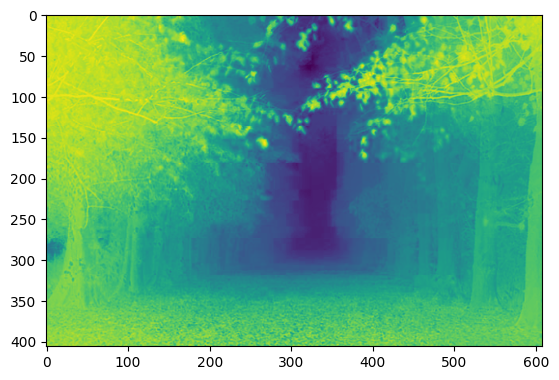

In [11]:
plt.imshow(t.reshape(im.shape[:2]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


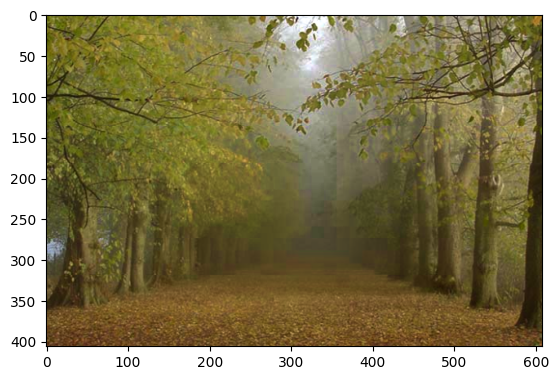

In [28]:
plt.imshow(J)

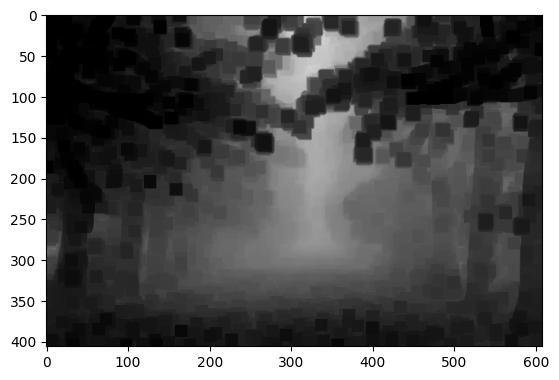

In [30]:
plt.imshow(dc, cmap="gray", vmin=0, vmax=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '$J$')

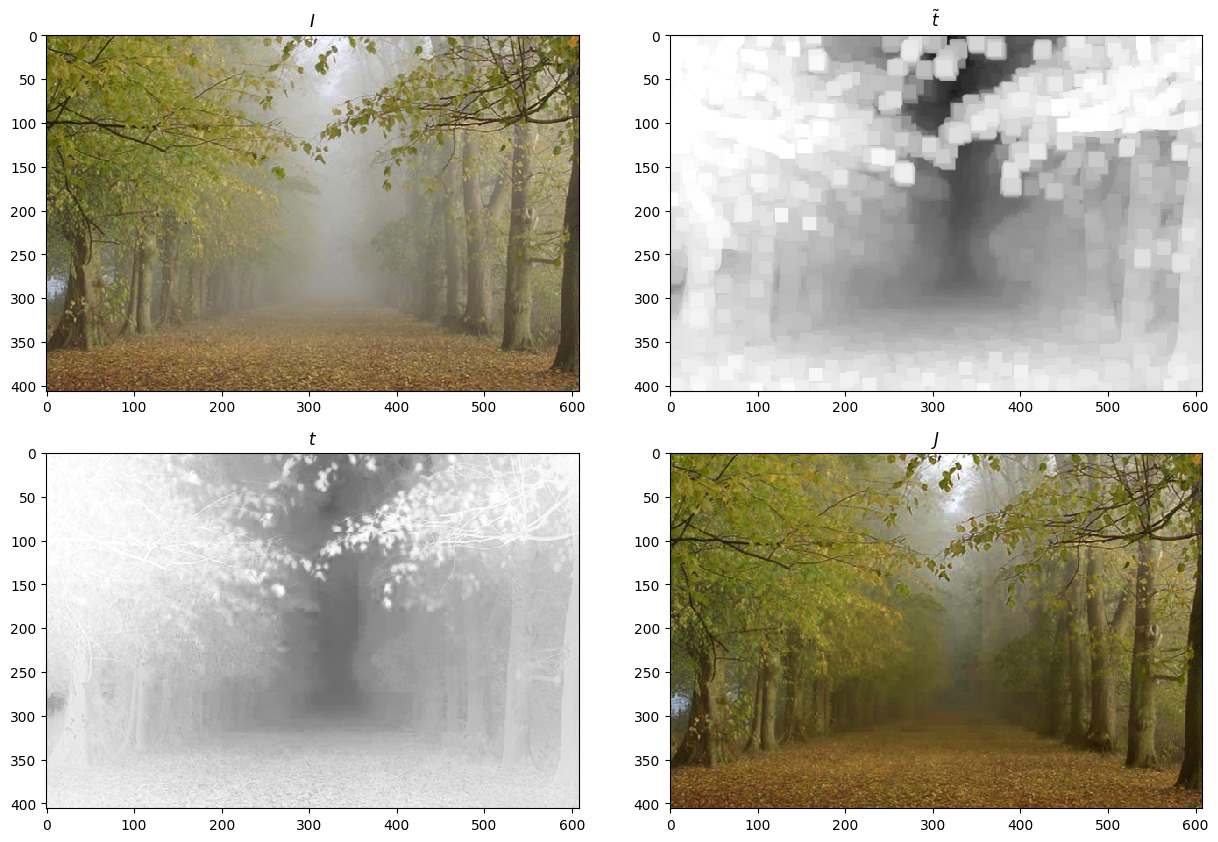

In [37]:
h, w = J.shape[:2]

fig,axs = plt.subplots(
    2, 2,  figsize=(w*2.1/100, h*2.1/100),
    tight_layout=True,
)
opt_f = {
"cmap": "gray",
"vmin": 0,
"vmax" : 1,
"interpolation": 'none'
}
axs[0][0].imshow(im, interpolation='none')
axs[0][0].set_title("$I$")
axs[0][1].imshow(tilde_t, **opt_f)
axs[0][1].set_title("$\\tilde{t}$")

axs[1][0].imshow(t, **opt_f)
axs[1][0].set_title("$t$")

axs[1][1].imshow(J, interpolation='none')
axs[1][1].set_title("$J$")